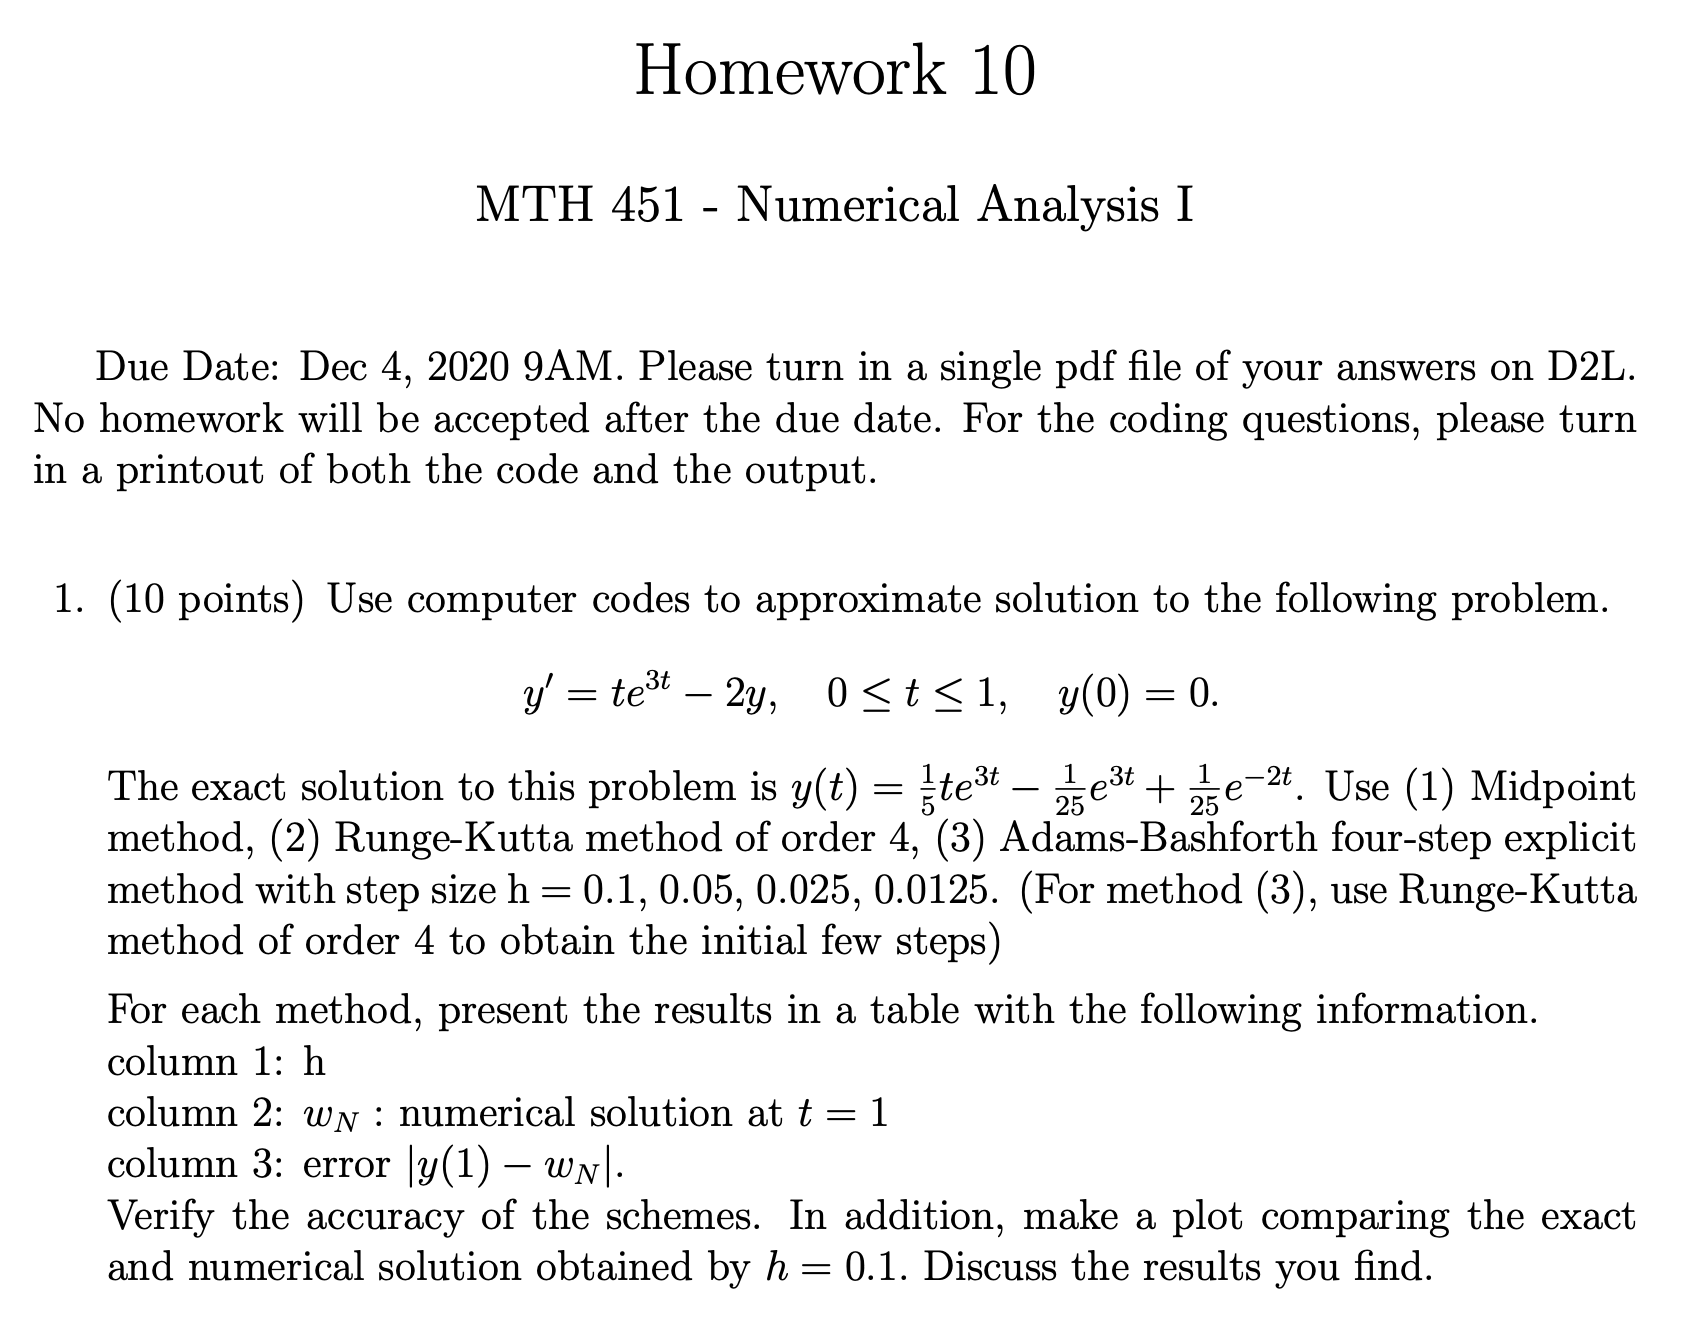

In [69]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# define the IVP problem
def f(t,y):
    f = t*np.exp(3*t)-2*y
    return f

In [73]:
# define the exact solution to the problem
def exact_IVP(t):
    y_t = 1/5*t*np.exp(3*t)-1/25*np.exp(3*t)+1/25*np.exp(-2*t)
    return y_t

In [87]:
# midpoint method
def midpoint_RK(a,b,init_val=0,t=1):
    print('h','| w_N at t=1','| error')
    plot_list = [init_val]
    for h in [0.1,0.05,0.025,0.0125]:
        w_prev = init_val
        ti = a
        N = int((b-a)/h)
        for i in range(1,N+1):
            w_new = w_prev + h*f(ti + h/2, w_prev + h/2*f(ti,w_prev))
            w_prev = w_new
            ti = a + i*h
            if h == 0.1:
                plot_list.append(w_new)
        print(h,w_new,abs(exact_IVP(1)-w_new))
    return plot_list

In [88]:
midpoint_RK(0,1)

h | w_N at t=1 | error
0.1 3.2254162829383928 0.006316963898901129
0.05 3.2209627882452705 0.001863469205778845
0.025 3.219598919093099 0.0004996000536072742
0.0125 3.2192283129646886 0.00012899392519694075


[0,
 0.0058091712136414154,
 0.026938344369962498,
 0.0713702051979051,
 0.15116254806102208,
 0.28425697060045574,
 0.4970661610355751,
 0.8281610600009983,
 1.333509067539735,
 2.093895845863808,
 3.2254162829383928]

In [86]:
# Runge-Kutta method (order four)
def RK_four(a,b,init_val=0,t=1):
    print('h','| w_N at t=1','| error')
    plot_list = [init_val]
    for h in [0.1,0.05,0.025,0.0125]:
        w_prev = init_val
        ti = a
        N = int((b-a)/h)
        for i in range(1,N+1):
            k1 = h*f(ti,w_prev)
            k2 = h*f(ti + h/2, w_prev + 1/2*k1)
            k3 = h*f(ti + h/2, w_prev + 1/2*k2)
            k4 = h*f(ti + h, w_prev + k3)
            w_new = w_prev + (k1 + 2*k2 + 2*k3 +k4)/6
            w_prev = w_new
            ti = a + i*h
            if h == 0.1:
                plot_list.append(w_new)
        print(h,w_new,abs(exact_IVP(1)-w_new))
    return plot_list

In [85]:
RK_four(0,1)

h | w_N at t=1 | error
0.1 3.2192833954633917 0.00018407642390005918
0.05 3.2191108316057946 1.1512566302940286e-05
0.025 3.219100037310253 7.18270761534967e-07
0.0125 3.219099363868304 4.4828812217900804e-08


[0.00575463131152366,
 0.026818770596771152,
 0.07115516451535381,
 0.15079506068018006,
 0.28364315904411613,
 0.49605971148690464,
 0.8265404176423425,
 1.3309444044737564,
 2.089901607341673,
 3.2192833954633917]

In [91]:
# Adams-Bashforth four-step explicit method
def AB_four_explicit(a,b,init_val=0,t=1):
    print('h','| w_N at t=1','| error')
    plot_list = []
    for h in [0.1,0.05,0.025,0.0125]:
        ti = a
        N = int((b-a)/h)
        w_prev = init_val
        # obtain w1, w2, and w3 using the RK method
        w_123 = list()
        t_123 = list()
        for i in range(3):
            k1 = h*f(ti,w_prev)
            k2 = h*f(ti + h/2, w_prev + 1/2*k1)
            k3 = h*f(ti + h/2, w_prev + 1/2*k2)
            k4 = h*f(ti + h, w_prev + k3)
            w_new = w_prev + (k1 + 2*k2 + 2*k3 +k4)/6
            w_123.append(w_new)
            w_prev = w_new # update w
            ti = a + i*h   # update ti
            t_123.append(ti)
            if h == 0.1:
                plot_list.append(w_new)
        wi_3 = init_val
        wi_2, wi_1, wi = w_123 # unpack wi, wi-1, wi-2
        ti_3 = a
        ti_2, ti_1, ti = t_123 # unpack ti, ti-1, ti-2 
        for i in range(3,N+1):
            w_new = wi + h/24*(55*f(ti,wi)-59*f(ti_1,wi_1)+37*f(ti_2,wi_2)-9*f(ti_3,wi_3))
            if h == 0.1:
                plot_list.append(w_new)
            # update w
            wi_3 = wi_2
            wi_2 = wi_1
            wi_1 = wi
            wi = w_new
            # update t
            ti_3 = ti_2
            ti_2 = ti_1
            ti_1 = ti
            ti = a + i*h
        print(h,w_new,abs(exact_IVP(1)-w_new))    
    return plot_list

In [92]:
AB_four_explicit(0,1)

h | w_N at t=1 | error
0.1 3.210203554453412 0.008895764586079657
0.05 3.2183883478497446 0.0007109711897470561
0.025 3.219055406693707 4.3912345784491436e-05
0.0125 3.2190982201874063 1.0988520853238981e-06


[0.00575463131152366,
 0.010466139787311797,
 0.030676239636181428,
 0.07031755320896169,
 0.15069622621289025,
 0.2815947204092701,
 0.4943817186381988,
 0.8230722352345778,
 1.326707518393281,
 2.083210313289915,
 3.210203554453412]

In [93]:
time = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
exact_sol = exact_IVP(time)
midpoint_RK_sol = midpoint_RK(0,1)
RK_four_sol = RK_four(0,1)
AB_four_explicit_sol = AB_four_explicit(0,1)

h | w_N at t=1 | error
0.1 3.2254162829383928 0.006316963898901129
0.05 3.2209627882452705 0.001863469205778845
0.025 3.219598919093099 0.0004996000536072742
0.0125 3.2192283129646886 0.00012899392519694075
h | w_N at t=1 | error
0.1 3.2192833954633917 0.00018407642390005918
0.05 3.2191108316057946 1.1512566302940286e-05
0.025 3.219100037310253 7.18270761534967e-07
0.0125 3.219099363868304 4.4828812217900804e-08
h | w_N at t=1 | error
0.1 3.210203554453412 0.008895764586079657
0.05 3.2183883478497446 0.0007109711897470561
0.025 3.219055406693707 4.3912345784491436e-05
0.0125 3.2190982201874063 1.0988520853238981e-06


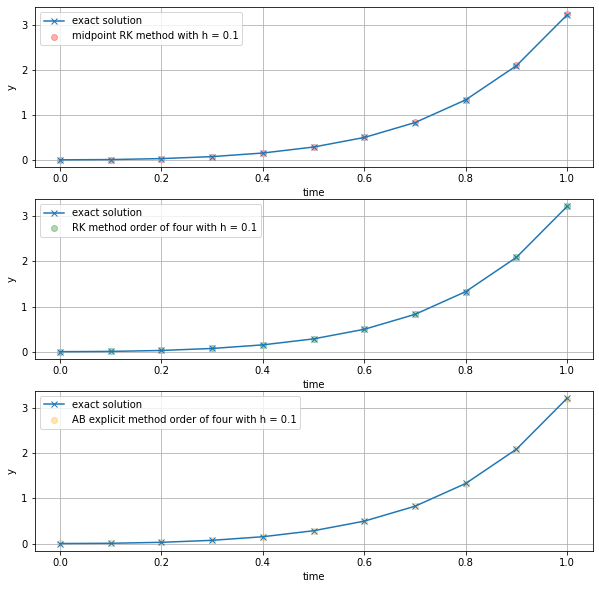

In [121]:
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot(time,exact_sol,label='exact solution',marker='x')
plt.scatter(time,midpoint_RK_sol,label='midpoint RK method with h = 0.1',color='red',alpha=0.3)
plt.xlabel('time')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(312)
plt.plot(time,exact_sol,label='exact solution',marker='x')
plt.scatter(time,RK_four_sol,label='RK method order of four with h = 0.1',color='green',alpha=0.3)
plt.xlabel('time')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(313)
plt.plot(time,exact_sol,label='exact solution',marker='x')
plt.scatter(time,AB_four_explicit_sol,label='AB explicit method order of four with h = 0.1',color='orange',alpha=0.3)
plt.xlabel('time')
plt.ylabel('y')
plt.legend()
plt.grid()